# Clustering using Single Linkage

Cosine distance function can be replaced with DTW or correlation measures.

Time series data are y1, y2, y3, y4 vectors. Difference (log-transform) are made for checking the stationarity using AD-fuller test.

Use single linkage clustering on un-transformed series. Set k=2 to obtain two groups.

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
x = np.arange(0,100)

m_std = 0.1
m1 = 5 + np.random.normal(0,m_std,100)
c1 = 100 + np.random.normal(0,5,100)
y1 = m1*x + c1

m2 = 5 + np.random.normal(0,m_std,100)
c2 = 130 + np.random.normal(0,5,100)
y2 = m2*x + c2

m3 = 1 + np.random.normal(0,m_std,100)
c3 = 50 + np.random.normal(0,5,100)
y3 = m3*x + c3

m4 = 1 + np.random.normal(0,m_std,100)
c4 = 75 + np.random.normal(0,5,100)
y4 = m3*x + c4

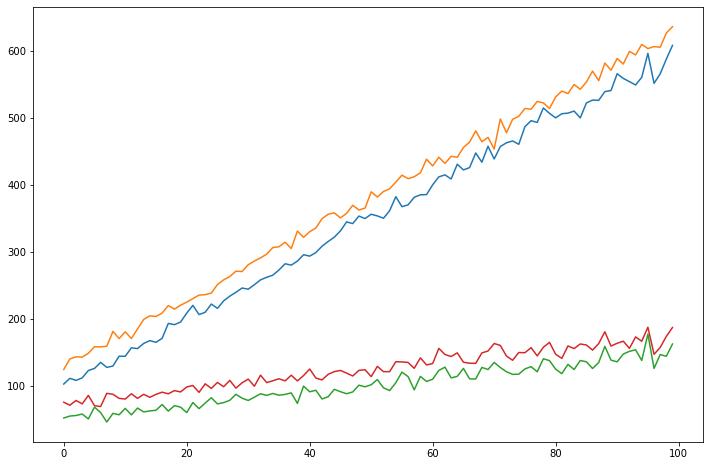

In [4]:
plt.figure(figsize=(12,8))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

## Clustering

In [15]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, fcluster
from fastcluster import linkage
from itertools import combinations
from scipy.spatial.distance import  euclidean, correlation, cosine, euclidean, cityblock
from fastdtw import fastdtw

In [5]:
# obtain difference if needed. 

def daily_return(s):
    """Note this is equivalent to log-transform."""
    return np.log(s[1:] / np.roll(s, 1)[1:])
y1_ret = daily_return(y1)
y2_ret = daily_return(y2)
y3_ret = daily_return(y3)
y4_ret = daily_return(y4)

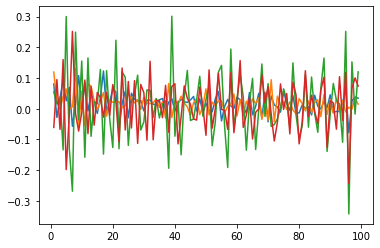

In [7]:
plt.plot(x[1:], y1_ret)
plt.plot(x[1:], y2_ret)
plt.plot(x[1:], y3_ret)
plt.plot(x[1:], y4_ret)

In [12]:
# Augmented Dickey-Fuller test
#  Noted here https://machinelearningmastery.com/time-series-data-stationary-python/
# - It uses an autoregressive model and optimizes an information criterion across multiple different lag values.
# - The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.
#
#  Rejecting the Null Hypothesis means the time-series is stationary. Failing to reject the null means it is non-stationary.
#
# Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
# Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
#
# and other methods to check if time-series is stationary or not
from statsmodels.tsa.stattools import adfuller


def is_stationary(y):
    X = y
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

print("Differenced data")
for i, ts in enumerate([y1_ret, y2_ret, y3_ret, y4_ret]):
    print("Series %s" % + 1)
    is_stationary(ts)

Series 0
ADF Statistic: -1.921731
p-value: 0.321908
Critical Values:
	1%: -3.505
	5%: -2.894
	10%: -2.584
Series 1
ADF Statistic: -2.296115
p-value: 0.173224
Critical Values:
	1%: -3.509
	5%: -2.896
	10%: -2.585
Series 2
ADF Statistic: -8.010154
p-value: 0.000000
Critical Values:
	1%: -3.503
	5%: -2.893
	10%: -2.584
Series 3
ADF Statistic: -7.867922
p-value: 0.000000
Critical Values:
	1%: -3.503
	5%: -2.893
	10%: -2.584


In [13]:
print("Untransformed data")
for i, ts in enumerate([y1, y2, y3, y4]):
    print("Series %s" % + 1)
    is_stationary(ts)

Untransformed data
Series 1
ADF Statistic: -0.596034
p-value: 0.871876
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584
Series 1
ADF Statistic: 0.191391
p-value: 0.971775
Critical Values:
	1%: -3.507
	5%: -2.895
	10%: -2.585
Series 1
ADF Statistic: 0.296529
p-value: 0.977185
Critical Values:
	1%: -3.503
	5%: -2.893
	10%: -2.584
Series 1
ADF Statistic: -0.703696
p-value: 0.845790
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584


All seem to be non-stationary.

## Distance Measure and Cluster Using Single Linkage

In [16]:
labels = ['y1', 'y2', 'y3', 'y4']
# combination in Python. n choose 2
dist_list = list(combinations(labels, 2))
dist_list # the list of pair to calculate distance

[('y1', 'y2'),
 ('y1', 'y3'),
 ('y1', 'y4'),
 ('y2', 'y3'),
 ('y2', 'y4'),
 ('y3', 'y4')]

In [27]:
items = [y1, y2, y3, y4]
# correlation(y1_ret, y2_ret)

D = pdist(items, cosine) # compute distance table
squareform(D)

array([[0.        , 0.00072432, 0.00875369, 0.0146136 ],
       [0.00072432, 0.        , 0.00661354, 0.01106702],
       [0.00875369, 0.00661354, 0.        , 0.00341368],
       [0.0146136 , 0.01106702, 0.00341368, 0.        ]])

array([1, 1, 2, 2], dtype=int32)

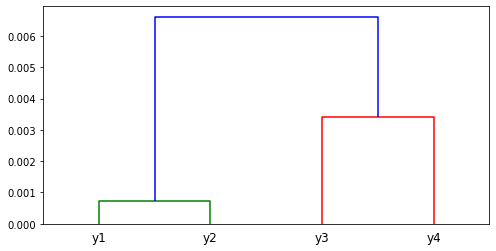

In [28]:
Z = linkage(D, method='single')
# Z
fig = plt.figure(figsize=(8, 4))
dn = dendrogram(Z, labels=labels)

k = 2
clusters = fcluster(Z, k, criterion='maxclust')
clusters # the output labels

Did not use log-transform of the series to cluster. This is reflected in the plot of return, std.dev, and last value below.

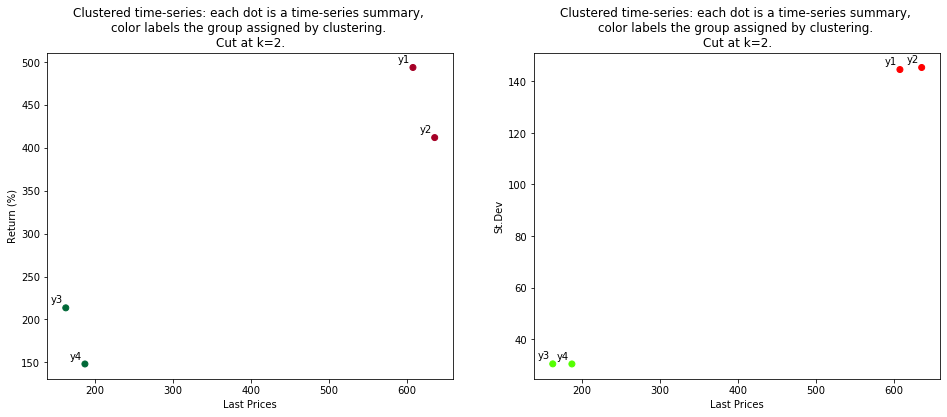

In [31]:
def plot_results(labels, X, clusters): 
    # plot with first value and last value 
    
    # obtain K from cluster 
    k = np.unique(clusters).size

    # X[0] # this is pd.Series object
    firsts = np.array(list(map(lambda ts: ts[0], X)))  # Standard deviation is X-axis
    lasts = np.array(list(map(lambda ts: ts[-1], X))) # Mean is Y-axis

    returns = (lasts - firsts) / firsts * 100 # Returns in pct

    plt.figure(figsize=(16, 6))
    # Plot 1
    plt.subplot(1,2,1)
    plt.scatter(lasts, returns, c=clusters, cmap='RdYlGn')  # plot points with cluster dependent colors
    plt.title("Clustered time-series: each dot is a time-series summary, \ncolor labels the group assigned by clustering. \nCut at k=%s." % k)
    plt.xlabel("Last Prices")
    plt.ylabel("Return (%)")

    # Add label:
    for label, x, y in zip(labels, lasts, returns):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-3, 3),
            textcoords='offset points', ha='right', va='bottom')
    
    # Plot 2
    plt.subplot(1,2,2)
    st_devs = list(map(np.std, X))  # Standard deviation is X-axis
    means = list(map(lambda ts: np.mean(ts), X)) # Mean is Y-axis
    plt.scatter(lasts, st_devs, c=clusters, cmap='prism')  # plot points with cluster dependent colors
    plt.title("Clustered time-series: each dot is a time-series summary, \ncolor labels the group assigned by clustering. \nCut at k=%s." % k)
    plt.xlabel("Last Prices")
    plt.ylabel("St.Dev")

    # Add label:
    for label, x, y in zip(labels, lasts, st_devs):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-3, 3),
            textcoords='offset points', ha='right', va='bottom')
    
plot_results(labels, items, clusters)